<details>
<summary>点击展开目录</summary>
<!-- TOC -->

- [工作原理](#工作原理)
- [K值选择](#k值选择)
- [距离计算](#距离计算)
    - [欧氏距离](#欧氏距离)
    - [曼哈顿距离](#曼哈顿距离)
    - [闵可夫斯基距离](#闵可夫斯基距离)
    - [切比雪夫距离](#切比雪夫距离)
    - [余弦距离](#余弦距离)

<!-- /TOC -->
</details>

## 工作原理

最近邻居法, K-近邻算法

是一种用于分类和回归的非参数统计方法

1. n维的坐标系中, 已知的元素映射在坐标系中
2. 未知的元素x, 提取坐标值, 映射到坐标系中
3. 计算x与其他已知元素的距离
4. 统计k个距离最近的元素, 对此k个元素进行分析, 从而确定元素x的分类

## K值选择

k过小: 噪声点影响

k过大: 分类交叉, 判断不明显

## 距离计算

<!-- ![](https://bkimg.cdn.bcebos.com/formula/3a06cb8159044706a0b3e12feb62244d.svg) -->

以下坐标表示中的x,y均不表示坐标轴

### 欧氏距离

点 `a(x1, x2), b(y1, y2)`

![](https://bkimg.cdn.bcebos.com/formula/34df776ddfdd406a96fbafedf1e0fcf4.svg)

N维空间

![](https://bkimg.cdn.bcebos.com/formula/87a52feb423631405eb499ddaec6941d.svg)

### 曼哈顿距离

两个点在坐标系上绝对轴距总和

`d(i, j) = |x1 - x2| + |y1 - y2|`

### 闵可夫斯基距离

![](https://bkimg.cdn.bcebos.com/formula/5461915cb8cdb80332251b27ecb23270.svg)

![](https://bkimg.cdn.bcebos.com/formula/199c95d9914c4b851533ce7e82bf8ecb.svg)

其中p代表空间的维数,
当p=1时, 就是曼哈顿距离;
当p=2时, 就是欧氏距离;
当p→∞时, 就是切比雪夫距离

### 切比雪夫距离

两个点坐标数值差的绝对值的最大值

点 `a(x1, x2), b(y1, y2)`

`d(i, j) = max(|x1 - y1|, |x2 - y2|)`

### 余弦距离

也叫余弦相似度

![](https://bkimg.cdn.bcebos.com/formula/50c51a907a949e8bbdbfa9219ed8bd35.svg)

余弦值的范围在`[-1, 1]`之间,
值越趋近于1, 代表两个向量的方向越接近,
越趋近于-1, 他们的方向越相反,
接近于0, 表示两个向量近乎于正交

[课程例子源码](https://github.com/cystanford/knn)

## 课程例子

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


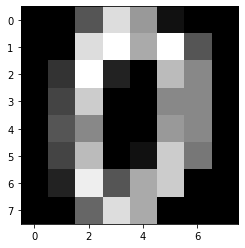

KNN准确率: 0.9822


In [ ]:
# -*- coding: utf-8 -*-
# 分类用
from sklearn.neighbors import KNeighborsClassifier
# 回归用
# from sklearn.neighbors import KNeighborsRegressor

# 手写数字分类
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# 加载数据
digits = load_digits()
data = digits.data
# 数据探索, (1797, 64) -> 1797幅数字图像,每幅图像大小是8*8像素
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()

# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

# 采用Z-Score规范化
# ss = preprocessing.StandardScaler()
# 采用Min-Max规范化
ss = preprocessing.MinMaxScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

# 创建KNN分类器
knn = KNeighborsClassifier()
knn.fit(train_ss_x, train_y)
predict_y = knn.predict(test_ss_x)
print("KNN准确率: %.4lf" % accuracy_score(test_y, predict_y))


## 例子

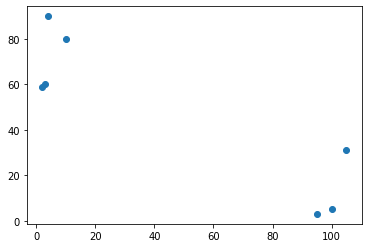

元素坐标为: [ 4 90] 分类结果为： 爱情


In [ ]:
# -*- coding: utf-8 -*-
from numpy import *
import operator
import numpy as np
import matplotlib.pyplot as plt

###通过KNN进行分类
def classify(input, dataSet, label, k):
    dataSize = dataSet.shape[0]
    ####计算欧式距离
    diff = tile(input, (dataSize, 1)) - dataSet
    sqdiff = diff ** 2
    ###行向量分别相加，从而得到新的一个行向量
    squareDist = sum(sqdiff, axis=1)
    dist = squareDist ** 0.5

    ##对距离进行排序
    ##argsort()根据元素的值从大到小对元素进行排序，返回下标
    sortedDistIndex = argsort(dist)

    classCount = {}
    for i in range(k):
        voteLabel = label[sortedDistIndex[i]]
        ###对选取的K个样本所属的类别个数进行统计
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
    ###选取出现的类别次数最多的类别
    maxCount = 0
    for key, value in classCount.items():
        if value > maxCount:
            maxCount = value
            classes = key
    return classes


def data1():
    group = array([[100, 5], [95, 3], [105, 31], [2, 59], [3, 60], [10, 80]])
    # labels = ['战狼', '红海行动', '碟中谍6', '前任3','春娇救志明','泰坦尼克号']
    labels = ['动作', '动作', '动作', '爱情', '爱情', '爱情']
    return group, labels


def data2():
    group = array([[1.0, 2.0], [1.2, 0.1], [0.1, 1.4], [0.3, 3.5]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

def img(x,y):
    plt.scatter(x,y)
    plt.show()

def case1():
    # 点例子
    # dataSet, labels = data2()
    # input = array([1.1, 0.3])

    # 电影例子
    dataSet, labels = data1()
    # input = array([90, 4]) # 动作
    input = array([4, 90])  # 爱情
    # 训练集坐标图
    x=[]
    y=[]
    for i in range(len(dataSet)):
        x.append(dataSet[i][0])
        y.append(dataSet[i][1])
    x.append(input[0])
    y.append(input[1])
    img(x,y)

    K = 3
    output = classify(input, dataSet, labels, K)
    print("元素坐标为:", input, "分类结果为：", output)

case1()


## 各种距离的计算

### 欧式距离

In [6]:
import numpy as np
from scipy.spatial.distance import pdist

a = np.array([1, 2])
b = np.array([4, 6])

# 公式
l1 = np.sqrt(np.sum(np.square(a - b)))
print(l1)
# numpy库
l2 = np.linalg.norm(a - b)
print(l2)
# scipy库
l3 = pdist(np.vstack([a, b]))
print(l3)

5.0
5.0
[5.]


### 曼哈顿距离

In [8]:
import numpy as np
from scipy.spatial.distance import pdist

a = np.array([1, 1])
b = np.array([2, 2])

# 公式
l1 = np.sum(np.abs(a - b))
print(l1)
# 库
l2 = np.linalg.norm(a - b, ord=1)
print(l2)
# scipy库
l3 = pdist(np.vstack([a, b]), 'cityblock')
print(l3)

2
2.0
[2.]


### 切比雪夫距离

In [9]:
import numpy as np
from scipy.spatial.distance import pdist

a = np.array([1, 2])
b = np.array([4, 7])
# 公式
l1 = np.abs(a - b).max()
print(l1)
# numpy
l2 = np.linalg.norm(a - b, ord=np.inf)
print(l2)
# scipy
l3 = pdist(np.vstack([a, b]), 'chebyshev')
print(l3)


5
5.0
[5.]


### 余弦距离

In [12]:
import numpy as np

a = np.array([1, 1, 1])
b = np.array([2, 2, 2])

l1 = np.dot(a, b) / (np.linalg.norm(a) * (np.linalg.norm(b)))
print(l1)


1.0000000000000002


## 闵可夫斯基距离

In [10]:
import numpy as np
from scipy.spatial.distance import pdist

a = np.array([1, 2])
b = np.array([4, 7])

# 公式
l1 = np.sqrt(np.sum(np.square(a - b)))
print(l1)
# scipy
l2 = pdist(np.vstack([a, b]), 'minkowski', p=2)
print(l2)


5.830951894845301
[5.83095189]
